## Exploring Financial Data using Nasdaq Data Link API

**The Nasdaq Data Link API provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the MER/F1 datatable, which contains detailed financial information such as balance sheets, cash flow statements, and income statements.**

**Objectives**
- Analyze the financial trend of 'accrued expenses turnover' over a period for various companies, particularly banks.
- Examine how different regions contribute to these financial metrics.

The API key is stored in a separate file for security reasons, so first we need to import this file to access the API key.

In [1]:
import config
api_key = config.API_KEY

Importing the needed libraries for our analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

Sending a GET request to get data from the API.

In [3]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

In [4]:
parameters = {'api_key':api_key, 'qopts.per_page':10000}
response = requests.get(api_url, params=parameters)
if response.status_code == 200:
    data = response.json()

Turning the JSON data into a Pandas DataFrame.

In [5]:
columns = [col['name'] for col in data['datatable']['columns']]
rows = data['datatable']['data']

In [6]:
df_metric = pd.DataFrame(rows, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


Exploring the DataFrame.

In [7]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

Choosing the necessary columns for the analysis

In [8]:
df_metric = df_metric[['amount', 'reportdate', 'reporttype', 'currency', 'longname', 'country', 'region', 'indicator', 'reportid']]
mapp = {'reportdate':'report_date', 'reporttype':'report_type', 'longname':'company_name'}
df_metric = df_metric.rename(columns=mapp)

In [9]:
df_metric.head()

,amount,report_date,report_type,currency,company_name,country,region,indicator,reportid
0,10.481948,2011-06-30,Q2,EUR,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,1868192544
1,8.161754,2011-09-30,Q3,EUR,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,1868216112
2,10.788213,2012-06-30,Q2,EUR,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,1885063456
3,9.437545,2012-09-30,Q3,EUR,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,1885087024
4,8.755041,2013-06-30,Q2,EUR,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,1901934112


In [10]:
df_metric['country'].value_counts()

country
USA    3253
CYM    1556
JPN    1303
IRL    1155
BHS     898
IND     608
CHE     554
AUS     228
CAN     106
BRA      62
KOR      54
GBR      51
FRA      33
CHL      22
IDN      21
FIN      16
BEL      14
ITA      14
HKG      12
DNK      12
ISR      12
ESP       8
DEU       8
Name: count, dtype: int64

Clarifying Country Names

In [11]:
country_names = {
    "USA": "United States of America",
    "CYM": "Cayman Islands",
    "JPN": "Japan",
    "IRL": "Ireland",
    "BHS": "Bahamas",
    "IND": "India",
    "CHE": "Switzerland",
    "AUS": "Australia",
    "CAN": "Canada",
    "BRA": "Brazil",
    "KOR": "South Korea",
    "GBR": "United Kingdom",
    "FRA": "France",
    "CHL": "Chile",
    "IDN": "Indonesia",
    "FIN": "Finland",
    "BEL": "Belgium",
    "ITA": "Italy",
    "HKG": "Hong Kong",
    "DNK": "Denmark",
    "ISR": "Israel",
    "ESP": "Spain",
    "DEU": "Germany"
}

df_metric['country'] = df_metric['country'].map(country_names)

In [12]:
df_metric.head()

,amount,report_date,report_type,currency,company_name,country,region,indicator,reportid
0,10.481948,2011-06-30,Q2,EUR,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,1868192544
1,8.161754,2011-09-30,Q3,EUR,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,1868216112
2,10.788213,2012-06-30,Q2,EUR,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,1885063456
3,9.437545,2012-09-30,Q3,EUR,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,1885087024
4,8.755041,2013-06-30,Q2,EUR,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,1901934112


In [13]:
df_metric['indicator'].value_counts()

indicator
EBITDA                                           291
EBITDA Margin                                    289
Total Assets Per Share                           244
Shares Outstanding                               239
EPS - Net Income - Diluted                       232
Free Cash Flow Per Share                         232
Revenue Per Share                                230
EPS - Net Income - Basic                         230
Weighted Average Shares Outstanding - Diluted    228
Weighted Average Shares Outstanding - Basic      227
Cash From Investing                              220
Net Income                                       220
Cash, Beginning of Year                          220
Cash From Operations                             219
Calculated Tax Rate                              219
Cash, End of Year                                219
Total Assets                                     217
Net Margin                                       217
Cash and Equivalents                

As we only need the `Accrued Expenses Turnover` indicator for our analysis, we are going to filter the `indicator` column based on that.

In [14]:
df_metric = df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']

In [15]:
df_metric.describe()

,amount,reportid
count,139.000000,1.390000e+02
mean,26.908762,1.633594e+09
std,33.097291,1.385283e+08
min,4.689773,1.504051e+09
25%,9.675670,1.543963e+09
50%,13.753753,1.581646e+09
75%,31.777614,1.622541e+09
max,229.810427,1.952498e+09


**Conclusion of the above table:**
- The Mean amount is 26.908.
- The Standard Deviasion is 33.097, which means that the data points are spread out from the mean.
- The Minumim value is 4.689.
- The Maximum value is 229.81.
- 25% of the data points are smaller than or equal 9.675.
- 50% of the data points are smaller than 13.75 and the other 50% are bigger than 13.75.
- 75% of the data points are smaller than or equal 31.777.

Filtering the data to a specific time period (2010-2015)

In [16]:
df_metric['report_date'] = pd.to_datetime(df_metric['report_date'], errors='coerce')
df_metric = df_metric[(df_metric['report_date'].dt.year >= 2010) & (df_metric['report_date'].dt.year <= 2015)]

In [17]:
df_metric = df_metric.sort_values(['company_name', 'report_date'])
df_metric = df_metric[['amount','report_date','company_name', 'region']]

Plotting each company's data to analyze the performance.

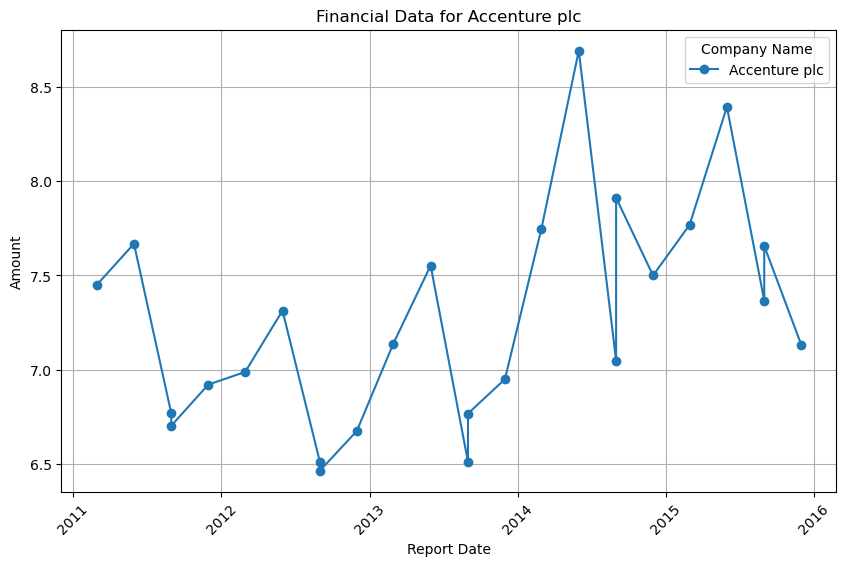

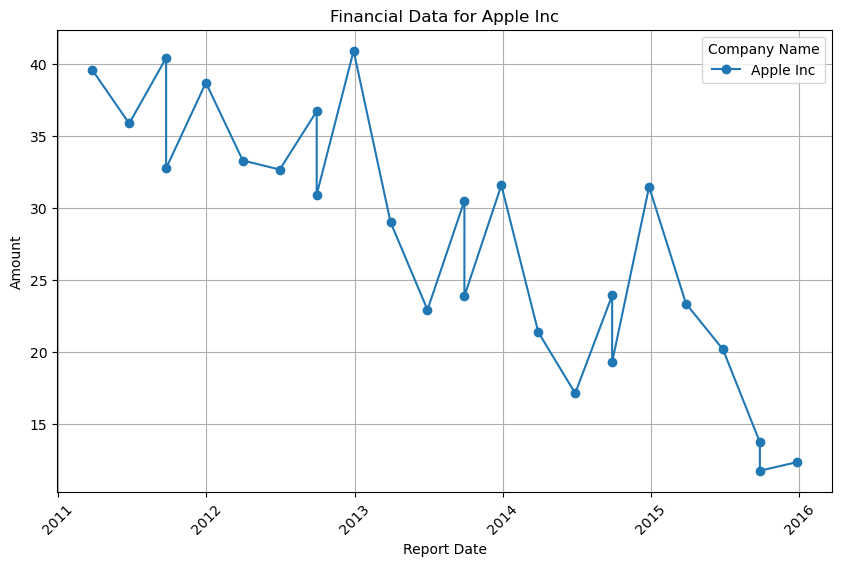

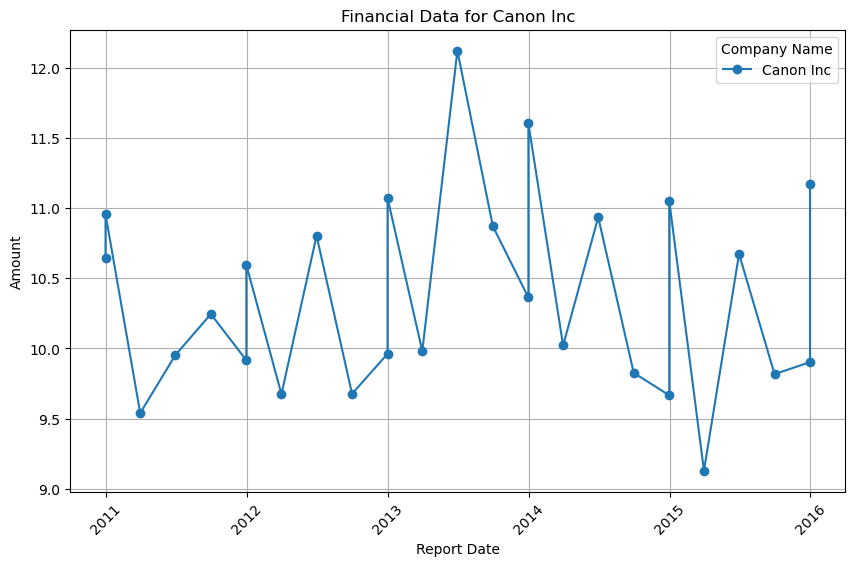

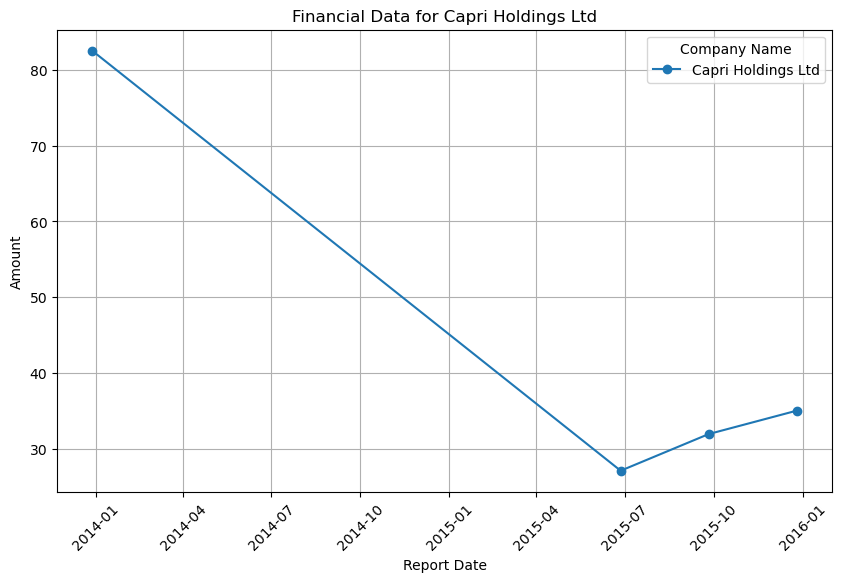

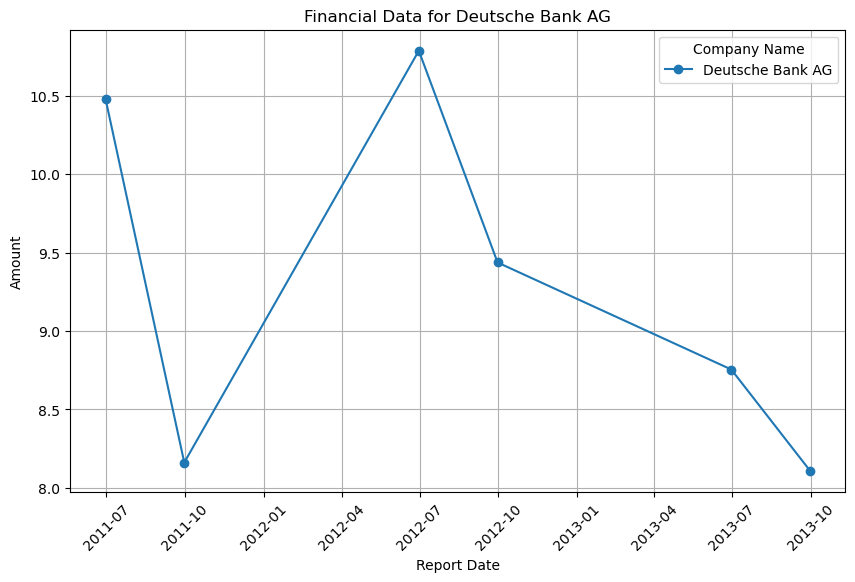

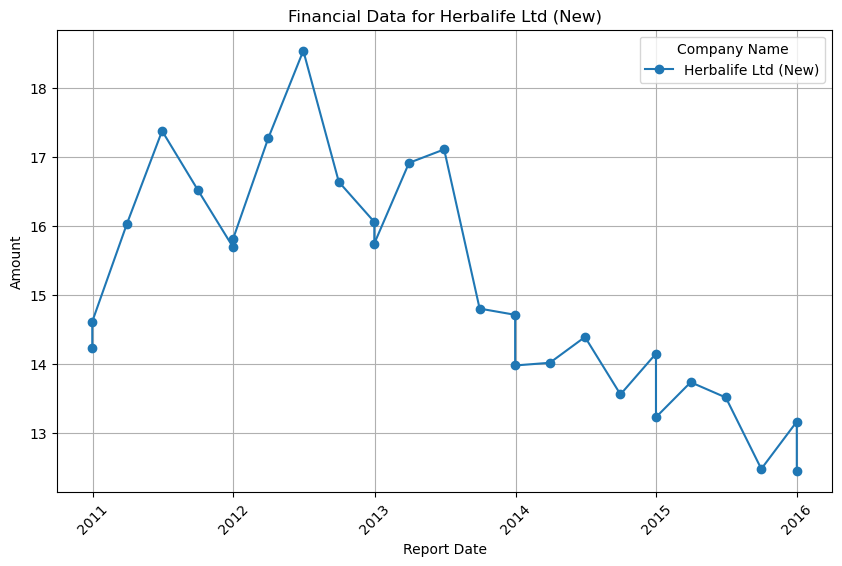

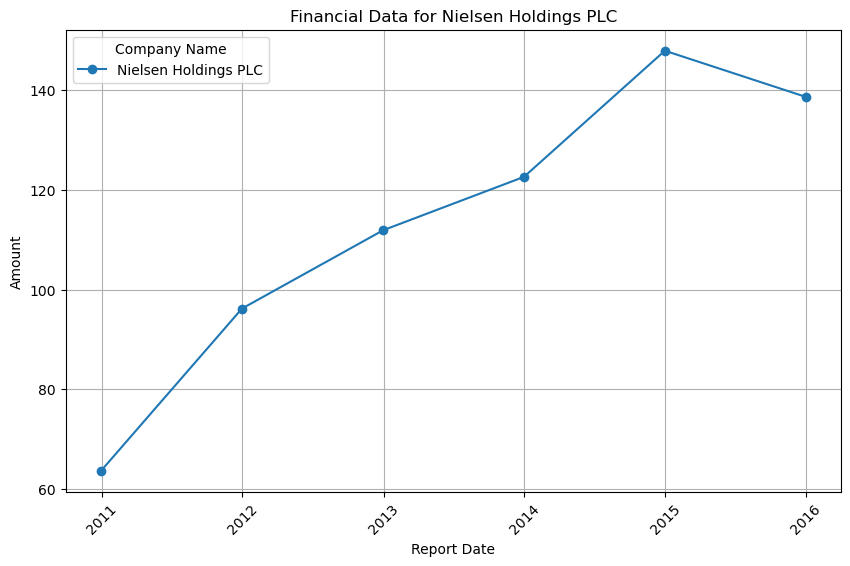

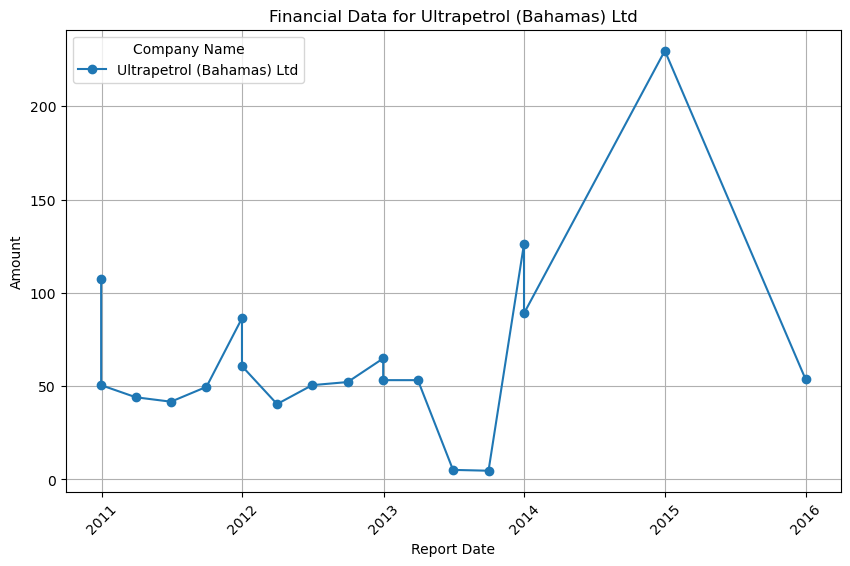

In [18]:
unique_companies = df_metric['company_name'].unique()
for company in unique_companies:
    company_data = df_metric[df_metric['company_name'] == company]
    
    plt.figure(figsize=(10, 6))
    plt.plot(company_data['report_date'], company_data['amount'], marker='o', label=company)
    plt.xlabel('Report Date')
    plt.ylabel('Amount')
    plt.title(f'Financial Data for {company}')
    plt.legend(title='Company Name')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


Getting the mean amount of each region.

In [19]:
region = df_metric.groupby('region')

In [20]:
avg = region['amount'].mean()

Plotting the mean accrued expenses turnover rate for each region.

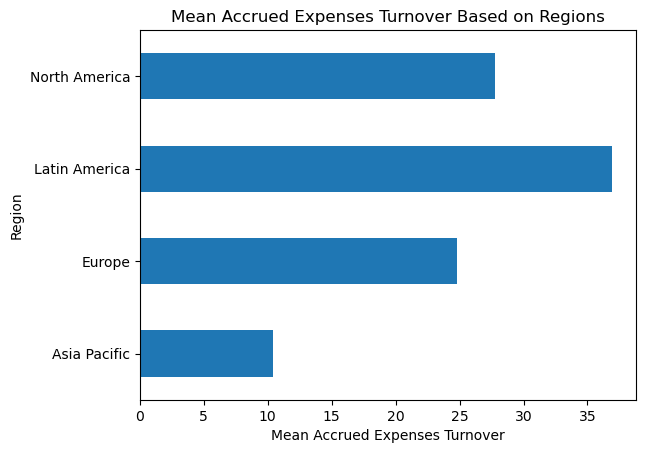

In [21]:
avg.plot(kind='barh')
plt.title('Mean Accrued Expenses Turnover Based on Regions')
plt.xlabel('Mean Accrued Expenses Turnover')
plt.ylabel('Region')
plt.show()

**Conclusion**
- Taking Deutsche Bank AG as an example, it's financial data plot shows a drop down in the expenses turnover rate from 2011 to 2013, that means that in 2013 with a rate of almost 8.2 they are taking longer to settle their accrued expenses or accumulating more liabilities relative to their expenses. This could potentially indicate liquidity issues or inefficiencies in managing short-term obligations.
- Latin America has the highest mean accrued expenses turnover rate, which means companies in this region are efficiently managing their accrued expenses, meaning they are paying off their short-term liabilities more quickly relative to its expenses.